# Importar Librerias

In [1]:
import pandas as pd # procesar datos, archivo CSV I/O (e.g. pd.read_csv)
import numpy as np  # linear algebra
import statistics 
import math
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set_theme()

from pandas_profiling import ProfileReport
from pandas_profiling.utils.cache import cache_file
#from darts import TimeSeries
%matplotlib inline

# Limpieza y cargar de datos

Carga de archivo usando Pandas

In [2]:
file_name = cache_file(
    "datasetSiniestro2.csv",
    "https://raw.githubusercontent.com/jgcotta/bigdata/master/datasetSiniestro.csv",
)

#If we need date
df = pd.read_csv(file_name, sep=';',parse_dates=[9])

df.dtypes
df.head(5)

,CODIGO_SINIESTRO,DIA,ACTOR_VIAL,ESTADO,EDAD,SEXO,TIPO_AUTOMOVIL,SERVICIO,ENFUGA,FECHA,HORA,HORA_NUM,GRAVEDAD,TIPO_ACCIDENTE,TOTAL_MUERTOS,TOTAL_HERIDOS,LOCALIDAD,DISENO_LUGAR
0,4401420,jueves,CONDUCTOR,ILESO,20,MASCULINO,Automovil,Particular,N,2015-01-01,13:00:00,13,Solo Danos,Choque,0,0,Ciudad Bolivar,"Tramo de Via,"
1,4401420,jueves,CONDUCTOR,ILESO,27,MASCULINO,Automovil,Publico,N,2015-01-01,13:00:00,13,Solo Danos,Choque,0,0,Ciudad Bolivar,"Tramo de Via,"
2,4401442,jueves,PASAJERO,HERIDO,22,MASCULINO,Motocicleta,Particular,N,2015-01-01,16:15:00,16,Con Heridos,Atropello,0,3,San Cristobal,"Interseccion,"
3,4401442,jueves,MOTOCICLISTA,HERIDO,42,MASCULINO,Motocicleta,Particular,N,2015-01-01,16:15:00,16,Con Heridos,Atropello,0,3,San Cristobal,"Interseccion,"
4,4401430,jueves,MOTOCICLISTA,HERIDO,27,MASCULINO,Motocicleta,Oficial,N,2015-01-01,7:15:00,7,Con Heridos,Volcamiento,0,1,Ciudad Bolivar,"Tramo de Via,"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352737 entries, 0 to 352736
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   CODIGO_SINIESTRO  352737 non-null  int64         
 1   DIA               352737 non-null  object        
 2   ACTOR_VIAL        352737 non-null  object        
 3   ESTADO            352737 non-null  object        
 4   EDAD              352737 non-null  int64         
 5   SEXO              352737 non-null  object        
 6   TIPO_AUTOMOVIL    352737 non-null  object        
 7   SERVICIO          352737 non-null  object        
 8   ENFUGA            352737 non-null  object        
 9   FECHA             352737 non-null  datetime64[ns]
 10  HORA              352737 non-null  object        
 11  HORA_NUM          352737 non-null  int64         
 12  GRAVEDAD          352737 non-null  object        
 13  TIPO_ACCIDENTE    352737 non-null  object        
 14  TOTA

In [4]:
df.describe()

,CODIGO_SINIESTRO,EDAD,HORA_NUM,TOTAL_MUERTOS,TOTAL_HERIDOS
count,3.527370e+05,352737.000000,352737.000000,352737.000000,352737.000000
mean,6.549421e+06,37.728965,12.831126,0.014138,0.695799
std,2.865247e+06,13.434792,5.391856,0.125487,2.599171
min,4.401419e+06,0.000000,0.000000,0.000000,0.000000
25%,4.445881e+06,27.000000,9.000000,0.000000,0.000000
50%,4.490195e+06,36.000000,13.000000,0.000000,0.000000
75%,1.046367e+07,47.000000,17.000000,0.000000,1.000000
max,1.051427e+07,120.000000,23.000000,4.000000,72.000000


Convertir variables numéricas a Categoricas

In [5]:
df[['EDAD', 'SEXO', 'HORA_NUM', 'TOTAL_MUERTOS', 'TOTAL_HERIDOS']].apply(lambda x: x.astype('category'))

#cols = ['EDAD', 'HORA_NUM', 'TOTAL_MUERTOS', 'TOTAL_HERIDOS']:

#df['EDAD'] = df['EDAD'].astype('category')

df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352737 entries, 0 to 352736
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   CODIGO_SINIESTRO  352737 non-null  int64         
 1   DIA               352737 non-null  object        
 2   ACTOR_VIAL        352737 non-null  object        
 3   ESTADO            352737 non-null  object        
 4   EDAD              352737 non-null  int64         
 5   SEXO              352737 non-null  object        
 6   TIPO_AUTOMOVIL    352737 non-null  object        
 7   SERVICIO          352737 non-null  object        
 8   ENFUGA            352737 non-null  object        
 9   FECHA             352737 non-null  datetime64[ns]
 10  HORA              352737 non-null  object        
 11  HORA_NUM          352737 non-null  int64         
 12  GRAVEDAD          352737 non-null  object        
 13  TIPO_ACCIDENTE    352737 non-null  object        
 14  TOTA

# Correlación Lineal (Variables Numéricas)

In [6]:
df.corr();

<AxesSubplot:>

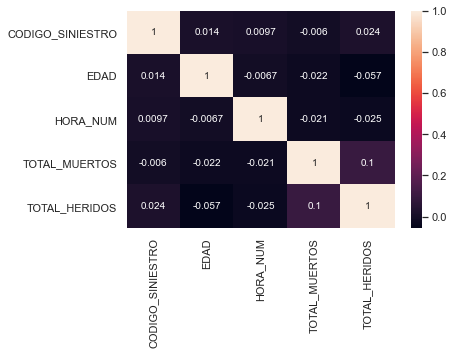

In [7]:
sns.heatmap(df.corr(),data=df,annot=True)

In [8]:
d=df.loc[:, ['EDAD', 'TOTAL_HERIDOS', 'SEXO', 'TOTAL_MUERTOS']]

In [9]:
dx = d.corr(method ='pearson')
dx

,EDAD,TOTAL_HERIDOS,TOTAL_MUERTOS
EDAD,1.000000,-0.057049,-0.022085
TOTAL_HERIDOS,-0.057049,1.000000,0.103783
TOTAL_MUERTOS,-0.022085,0.103783,1.000000


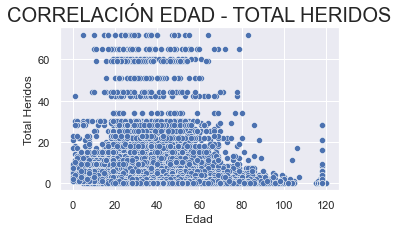

In [10]:
fig, ax = plt.subplots(figsize = ( 5 , 3 ))

sns.scatterplot(ax = ax, x="EDAD", y="TOTAL_HERIDOS", data=df);
# Set label for x-axis
ax.set_xlabel( "Edad" , size = 12 )
  
# Set label for y-axis
ax.set_ylabel( "Total Heridos" , size = 12 )
  
# Set title for plot
ax.set_title( "CORRELACIÓN EDAD - TOTAL HERIDOS" , size = 20 )
plt.show()

Quitar duplicados.

In [11]:
drop_duplicates=df.drop_duplicates(subset=['CODIGO_SINIESTRO'])

# Análisis exploratorio variables categóricas

Histograma de Edad de implicados en accidentes

array([[<AxesSubplot:title={'center':'EDAD'}>]], dtype=object)

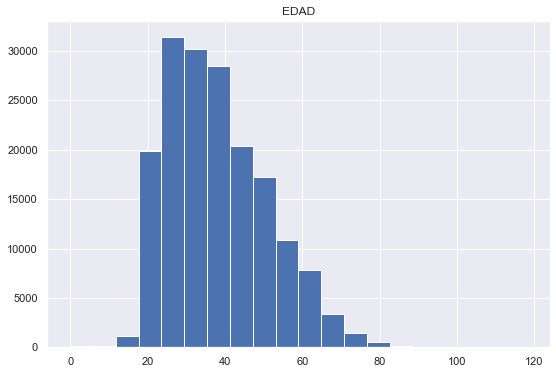

In [12]:
drop_duplicates.hist(column='EDAD',    # Column to plot
                   figsize=(9,6),   # Plot size
                   bins=20) 

Agrupación de la población por actor víal

In [13]:
tf2 = pd.crosstab(index=drop_duplicates["ACTOR_VIAL"],columns="Cantidad") 
tf2

col_0,Cantidad
ACTOR_VIAL,
CICLISTA,1825
CONDUCTOR,145341
MOTOCICLISTA,22076
PASAJERO,4064


Se obtiene la proporción del tipo de personas involucradas.

<AxesSubplot:title={'center':'ACTOR VIAL'}>

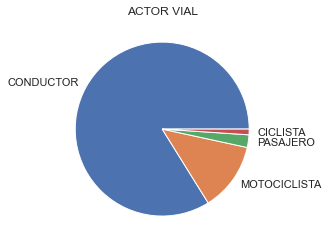

In [14]:
drop_duplicates.ACTOR_VIAL.value_counts().plot(kind='pie', ylabel = "", title="ACTOR VIAL")

In [15]:
tf2/tf2.sum()

col_0,Cantidad
ACTOR_VIAL,
CICLISTA,0.010531
CONDUCTOR,0.838638
MOTOCICLISTA,0.127382
PASAJERO,0.023450


In [16]:
dsexo = (drop_duplicates.groupby("SEXO").agg(Frecuencia=("SEXO", "count")).head())
dsexo

,Frecuencia
SEXO,
FEMENINO,18820
MASCULINO,154486


<AxesSubplot:title={'center':'SEXO'}>

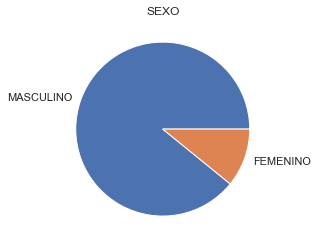

In [17]:
drop_duplicates.SEXO.value_counts().plot(kind='pie', ylabel = "", title="SEXO")

# PREGUNTAS DESCRIPTIVAS

1. ¿Cual es el día de la semana con mayor número de accidentes del periodo entre 2015 al 2019?

La día con más accidentados es el "VIERNES"

In [18]:
tf3 = pd.crosstab(index=drop_duplicates["DIA"], 
                     columns="Cantidad") 
tf3

col_0,Cantidad
DIA,
domingo,16912
jueves,25845
lunes,23797
martes,26839
miercoles,25936
sabado,26125
viernes,27852


<AxesSubplot:title={'center':'DIA'}>

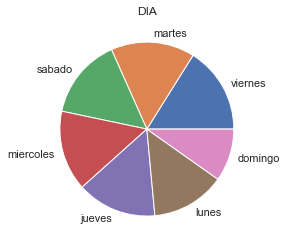

In [19]:
df.DIA.value_counts().plot(kind='pie', ylabel = "", title="DIA")

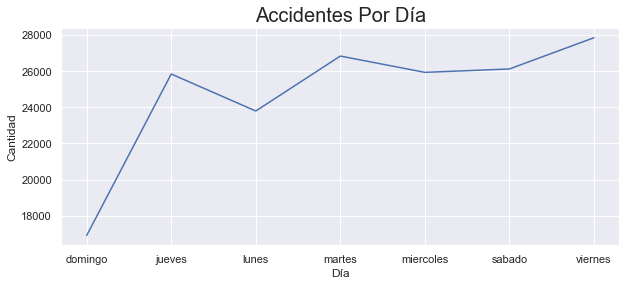

In [20]:
#tf3.plot.line(stacked=True)

line,ax = plt.subplots(figsize=(10,4))
# Set title for plot
ax.set_title("Accidentes Por Día", fontsize=20)
# Set label for y-axis
ax.set_xlabel( "Día" , size = 12 )
sns.lineplot(x = "DIA", y = "Cantidad", data = tf3)
plt.show()


2. ¿Cual es la localidad con mayor número de accidentes del periodo entre 2015 al 2019?

La tendencia indica que la localidad con mayor número de accidentes para el periodo es "KENNEDY"

In [21]:
#df.LOCALIDAD
localidades = drop_duplicates.LOCALIDAD.unique()
len(localidades)

20

In [22]:
localidades_por_accidente= drop_duplicates.LOCALIDAD.value_counts()
localidades_por_accidente

Kennedy               19436
Usaquen               17693
Engativa              17615
Suba                  15687
Fontibon              13865
Puente Aranda         12079
Chapinero             10614
Barrios Unidos         9447
Teusaquillo            9352
Bosa                   8271
Ciudad Bolivar         6794
Los Martires           5898
Santa Fe               5035
Tunjuelito             4698
San Cristobal          4671
Rafael Uribe Uribe     4388
Antonio Narino         3430
Usme                   3427
La Candelaria           901
Sumapaz                   5
Name: LOCALIDAD, dtype: int64

<AxesSubplot:>

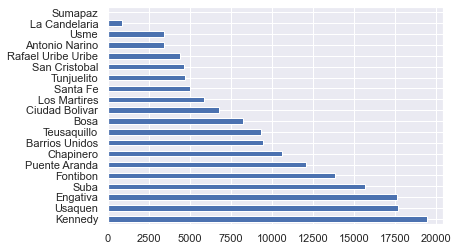

In [23]:
localidades_por_accidente.plot(kind='barh')

3. ¿Cual es la hora con mayor indice accidentalidad del periodo entre 2015 al 2019?

In [24]:
dhora = pd.crosstab(index=drop_duplicates["HORA_NUM"], 
                     columns="Cantidad") 

In [25]:
maximo = dhora[dhora.Cantidad == dhora.Cantidad.max()]
maximo

col_0,Cantidad
HORA_NUM,
14,11454


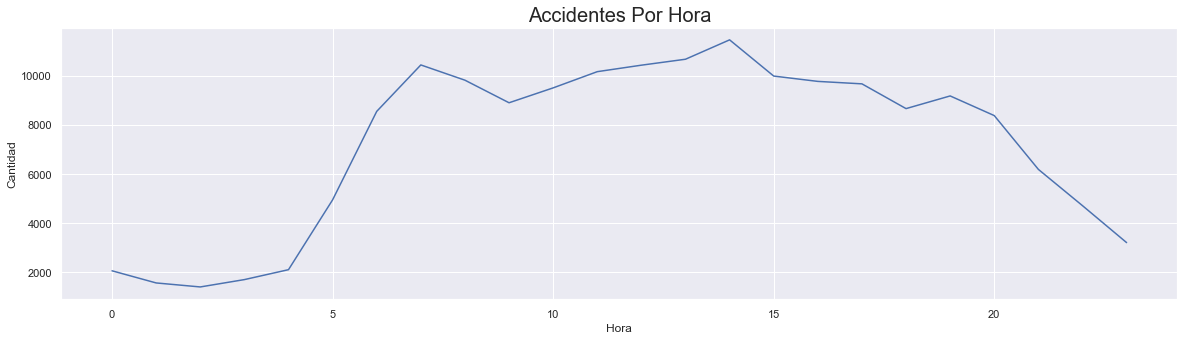

In [26]:
line,ax = plt.subplots(figsize=(20,5))
# Set title for plot
ax.set_title("Accidentes Por Hora", fontsize=20)
# Set label for y-axis
ax.set_xlabel( "Hora" , size = 12 )
sns.lineplot(x = "HORA_NUM", y = "Cantidad", data = dhora)
plt.show()

4. ¿Cúal fue la fecha con mayor indice de accidentalidad del año 2019?

In [27]:
start_date = "2019-1-1"
end_date = "2019-12-31"
after_start_date = drop_duplicates["FECHA"] >= start_date
before_end_date = drop_duplicates["FECHA"] <= end_date
between_two_dates = after_start_date & before_end_date
filtered_dates = drop_duplicates.loc[between_two_dates]
tf4 = pd.crosstab(index=filtered_dates["FECHA"], columns="Cantidad") 
maximo = tf4[tf4.Cantidad == tf4.Cantidad.max()]
maximo

col_0,Cantidad
FECHA,
2019-06-12,155


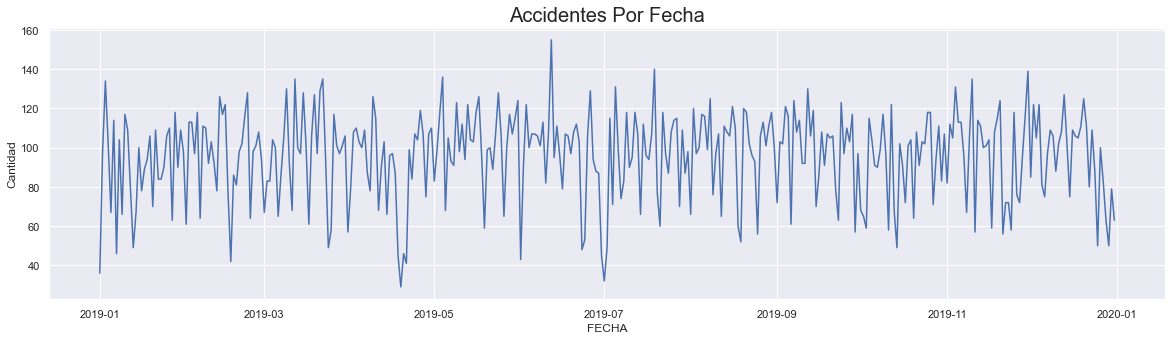

In [28]:
line,ax = plt.subplots(figsize=(20,5))
ax.set_title("Accidentes Por Fecha", fontsize=20)
sns.lineplot(x = "FECHA", y = "Cantidad", data = tf4)
plt.show()

# HIPOTESIS DIAGNOSTICAS

Distribución normal

Hipótesis nula: ¿La edad de las personas influyo en la ocurrencia de los accidentes en 2019?
Hipótesis alternativa: no influye \\
Parámetros de población: Media = pop_mean_2015, desviación estándar = pop_std_2015
Parámetros de muestra: Media = sample_mean_2016, desviación estándar = sample_std_2016

In [29]:
edadaccidente_2015 = df #[df['FECHA'] ==2015] -- REVISAR NO FILTRO
edadaccidente_2015
#edadaccidente_2019 = df[df['FECHA'] ==2019]

,CODIGO_SINIESTRO,DIA,ACTOR_VIAL,ESTADO,EDAD,SEXO,TIPO_AUTOMOVIL,SERVICIO,ENFUGA,FECHA,HORA,HORA_NUM,GRAVEDAD,TIPO_ACCIDENTE,TOTAL_MUERTOS,TOTAL_HERIDOS,LOCALIDAD,DISENO_LUGAR
0,4401420,jueves,CONDUCTOR,ILESO,20,MASCULINO,Automovil,Particular,N,2015-01-01,13:00:00,13,Solo Danos,Choque,0,0,Ciudad Bolivar,"Tramo de Via,"
1,4401420,jueves,CONDUCTOR,ILESO,27,MASCULINO,Automovil,Publico,N,2015-01-01,13:00:00,13,Solo Danos,Choque,0,0,Ciudad Bolivar,"Tramo de Via,"
2,4401442,jueves,PASAJERO,HERIDO,22,MASCULINO,Motocicleta,Particular,N,2015-01-01,16:15:00,16,Con Heridos,Atropello,0,3,San Cristobal,"Interseccion,"
3,4401442,jueves,MOTOCICLISTA,HERIDO,42,MASCULINO,Motocicleta,Particular,N,2015-01-01,16:15:00,16,Con Heridos,Atropello,0,3,San Cristobal,"Interseccion,"
4,4401430,jueves,MOTOCICLISTA,HERIDO,27,MASCULINO,Motocicleta,Oficial,N,2015-01-01,7:15:00,7,Con Heridos,Volcamiento,0,1,Ciudad Bolivar,"Tramo de Via,"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352732,10507444,martes,CONDUCTOR,ILESO,43,MASCULINO,Automovil,Particular,N,2019-12-31,6:03:00,6,Solo Danos,Choque,0,0,Bosa,"Tramo de Via,"
352733,10507444,martes,CONDUCTOR,ILESO,52,FEMENINO,Camioneta,Particular,N,2019-12-31,6:03:00,6,Solo Danos,Choque,0,0,Bosa,"Tramo de Via,"
352734,10507452,martes,CONDUCTOR,ILESO,52,MASCULINO,Automovil,Publico,N,2019-12-31,19:40:00,19,Solo Danos,Choque,0,0,Usaquen,"Tramo de Via,"
352735,10507452,martes,CONDUCTOR,ILESO,24,MASCULINO,Automovil,Particular,N,2019-12-31,19:40:00,19,Solo Danos,Choque,0,0,Usaquen,"Tramo de Via,"


In [30]:
pop_mean_2015 = edadaccidente_2015['EDAD'].mean()
pop_std_2015 = statistics.stdev(edadaccidente_2015.EDAD)
print("Population Mean: "+str(pop_mean_2015))
print("Population Standard Deviation: "+str(pop_std_2015))

Population Mean: 37.72896520637189
Population Standard Deviation: 13.434791870448077


In [31]:
#print("Media Edad de la Población: "+str(periodo_2019['FECHA'].mean()))
#periodo_2019_sample = periodo_2019.sample(frac=0.10)
#periodo_media_2019 = periodo_2019_sample['EDAD'].mean()
#print("Media de la Muestra: "+str(periodo_media_2019))
#periodo_std_2019 = statistics.stdev(periodo_2019_sample.EDAD)
#print("Desviación Estandar Muestra: "+str(periodo_std_2019))

In [32]:
#zscore_critical = 1.65 
# Calculate the test statistics 
#zscore_test_stat = ((sample_mean_2016 - pop_mean_2015)*math.sqrt(8916))/sample_std_2016
#print(zscore_test_stat)

Conclusión: como las estadísticas de prueba caen en la región de rechazo, se rechaza la hipótesis nula y se puede concluir que los salarios anuales aumentan en 201. Sin embargo, primero verificaremos los errores de tipo 1 y tipo 2

# TABLA DE FRECUENCIA

In [33]:
#Formart to percentage
format_dict = {'CONDUCTOR': '{:.2%}','PASAJERO': '{:.2%}','CICLISTA': '{:.2%}','MOTOCICLISTA': '{:.2%}','FILA_TOTAL': '{:.2%}'}
genero_actor = pd.crosstab(index=df["SEXO"], 
                           columns=df["ACTOR_VIAL"],margins=True)
genero_actor.columns = ["CONDUCTOR","PASAJERO","CICLISTA","MOTOCICLISTA","FILA_TOTAL"]
genero_actor.index= ["MASCULINO","FEMENINO","COL_TOTAL"]
genero_actor

,CONDUCTOR,PASAJERO,CICLISTA,MOTOCICLISTA,FILA_TOTAL
MASCULINO,1788,27229,3623,15708,48348
FEMENINO,8510,245795,41443,8641,304389
COL_TOTAL,10298,273024,45066,24349,352737


Tabla de frecuencias Relativas: Relación entre Actor_vial y genéro implicado en sinisetro (En porcentaje), El 77.40% de los implicados en accidentes, son mujeres pasajeros de algún servicio público.

In [34]:
tabla_relativa=genero_actor/genero_actor.loc["COL_TOTAL","FILA_TOTAL"]
tabla_relativa.style.format(format_dict)

,CONDUCTOR,PASAJERO,CICLISTA,MOTOCICLISTA,FILA_TOTAL
MASCULINO,0.51%,7.72%,1.03%,4.45%,13.71%
FEMENINO,2.41%,69.68%,11.75%,2.45%,86.29%
COL_TOTAL,2.92%,77.40%,12.78%,6.90%,100.00%


Frecuencias Condicionadas(Proporciones) por columnas(Cada valor/total de la condicion de la columna). Ejemplo: Entre el año 2015 al 2019 de los conductores de automóviles implicados en accidentes, el 82.64% son mujeres. 

In [35]:
condicionada1=genero_actor/genero_actor.loc["COL_TOTAL"]
condicionada1[["CONDUCTOR","PASAJERO","CICLISTA","MOTOCICLISTA"]].style.format(format_dict)

,CONDUCTOR,PASAJERO,CICLISTA,MOTOCICLISTA
MASCULINO,17.36%,9.97%,8.04%,64.51%
FEMENINO,82.64%,90.03%,91.96%,35.49%
COL_TOTAL,100.00%,100.00%,100.00%,100.00%


Frecuencias Condicionadas(Proporciones) por Filas(Cada valor/total de la condicion de la fila). Ejemplo: Del 2015 al 2019 de los siniestros de tránsito en Bogotá, de la población masculina el 32.49% de los accidentados fueron motociclistas.

In [36]:
condicionada2=genero_actor.div(genero_actor["FILA_TOTAL"],
                   axis=0)
condicionada2.loc[["MASCULINO","FEMENINO"]].style.format(format_dict)

,CONDUCTOR,PASAJERO,CICLISTA,MOTOCICLISTA,FILA_TOTAL
MASCULINO,3.70%,56.32%,7.49%,32.49%,100.00%
FEMENINO,2.80%,80.75%,13.62%,2.84%,100.00%
